<a href="https://colab.research.google.com/github/delacruzsebastian-cpu/IA/blob/main/taller_TITANIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Uso de datasets disponibles, y selección de método de clasificación.**
**SEBASTIAN DE LA CRUZ**

**Dataset de Titanic**


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import timeit
%matplotlib inline
from scipy.spatial import distance
from sklearn import svm
# Implementación de Modelos
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import DistanceMetric
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler #Escalizar datos 
# Métricas a implementar
from sklearn.metrics import matthews_corrcoef, accuracy_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [22]:
def Importar(df):
 
 # Depuración de datos incompletos
  df = df[df.Age.isna() == False] #Edad
  df = df[df.Embarked.isna() == False] #Puerto
 
  for i in range(df.shape[0]):
 
    # Sexo 
    if df.iat[i,2] == 'male':
      df.iat[i,2] = 0 #Masculino=0
    else:
      df.iat[i,2] = 1 #Femenino=1
    # Puerto
    if df.iat[i,5] == 'S': #Puerto S = 0
      df.iat[i,5] = 0
    elif df.iat[i,5] == 'C': #Puerto C = 1
      df.iat[i,5] = 1
    else:
      df.iat[i,5] = 2 #Puerto Q= 2
  
  df = df.astype('int8')
  print(df.head())
  X = df.drop(columns=['Survived']).values
  Y = df['Survived'].values
  return X,Y

# Conjunto de entrenamiento
train = pd.read_csv('/content/drive/MyDrive/train.csv',usecols=[1,2,4,5,6,11]) #Determinación de columnas a usar
train.columns = ['Survived','PClass','Sex','Age','SibSp','Embarked']
X_train,y_train = Importar(train)

# Conjunto de prueba
test = pd.read_csv('/content/drive/MyDrive/test.csv',usecols=[1,3,4,5,10]) #Determinación de columnas 
test.columns = ['PClass','Sex','Age','SibSb','Embarked']
sup = pd.read_csv('/content/drive/MyDrive/gender_submission.csv',usecols=[1]).values
test.insert(0, "Survived", sup, False)
X_test,y_test = Importar(test)

# Escalización de datos
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


   Survived  PClass  Sex  Age  SibSp  Embarked
0         0       3    0   22      1         0
1         1       1    1   38      1         1
2         1       3    1   26      0         0
3         1       1    1   35      1         0
4         0       3    0   35      0         0
   Survived  PClass  Sex  Age  SibSb  Embarked
0         0       3    0   34      0         2
1         1       3    1   47      1         0
2         0       2    0   62      0         2
3         0       3    0   27      0         0
4         1       3    1   22      1         0


**Clasificación por KNN**

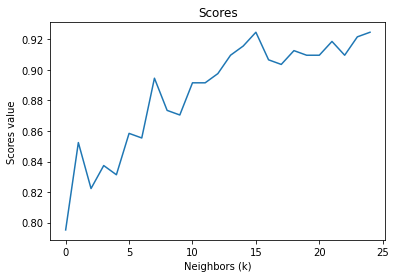

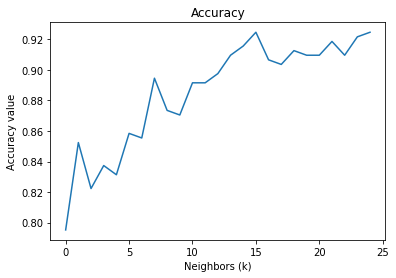

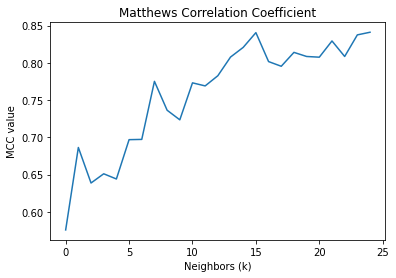

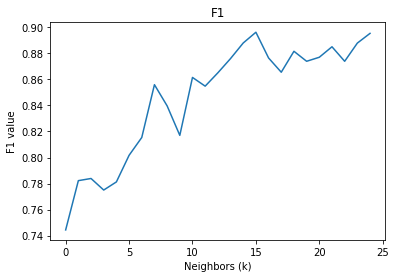

Best k by Scores: 16 . Value: 0.9246987951807228
Best k by Accuracy: 16 . Value: 0.9246987951807228
Best k by MCC: 25 . Value: 0.8409699171980937
Best k by F1: 16 . Value: 0.896265560165975


In [25]:
k_range = range(1, int(np.sqrt(len(y_train))))

#Distances: euclidean. manhattan. chebyshev. minkowski. seuclidean. mahalanobis. hamming
distance='euclidean'

scores = []
acc = []
MCC = []
F1 = []

for k in k_range:
  knn = KNeighborsClassifier(n_neighbors = k, weights='uniform', metric=distance, metric_params=None, algorithm='brute')
  knn.fit(X_train, y_train)
  scores.append(knn.score(X_test, y_test))
  y_test_predict = knn.predict(X_test)
  acc.append(accuracy_score(y_test, y_test_predict))
  MCC.append(matthews_corrcoef(y_test, y_test_predict))
  F1.append(f1_score(y_test,y_test_predict))

plt.plot(scores)
plt.title("Scores")
plt.xlabel("Neighbors (k)")
plt.ylabel("Scores value")
plt.show()
plt.plot(acc)
plt.title("Accuracy")
plt.xlabel("Neighbors (k)")
plt.ylabel("Accuracy value")
plt.show()
plt.plot(MCC)
plt.title("Matthews Correlation Coefficient")
plt.xlabel("Neighbors (k)")
plt.ylabel("MCC value")
plt.show()
plt.plot(F1)
plt.title("F1")
plt.xlabel("Neighbors (k)")
plt.ylabel("F1 value")
plt.show()

print("Best k by Scores:",k_range[np.argmax(scores)],". Value:",scores[np.argmax(scores)])
print("Best k by Accuracy:",k_range[np.argmax(acc)],". Value:",acc[np.argmax(acc)])
print("Best k by MCC:",k_range[np.argmax(MCC)],". Value:",MCC[np.argmax(MCC)])
print("Best k by F1:",k_range[np.argmax(F1)],". Value:",F1[np.argmax(F1)])

Usaremos el mejor resultado de MCC, ya que tiene en cuenta todos los posibles tipos de error.

In [28]:
n_neighbors = 25

knn = KNeighborsClassifier(n_neighbors, weights='uniform', metric=distance, metric_params=None, algorithm='auto')
knn = knn.fit(X_train, y_train)

y_predict=knn.predict(X_train)
print('Train subset')
print('Accuracy of K-NN classifier on training set: {:.5f}'
     .format(accuracy_score(y_train, y_predict)))
print('MCC of K-NN classifier on training set: {:.5f}'
     .format(matthews_corrcoef(y_train, y_predict)))

t0 = timeit.default_timer()
y_predict_knn=knn.predict(X_test)
time = timeit.default_timer() - t0
print('\nTest subset')
print('Accuracy of K-NN classifier on test set: {:.5f}'
     .format(accuracy_score(y_test, y_predict_knn)))
print('MCC of K-NN classifier on test set: {:.5f}'
     .format(matthews_corrcoef(y_test, y_predict_knn)))
print('\nClassification time: {:.5f}'.format(time),'s')

Train subset
Accuracy of K-NN classifier on training set: 0.83427
MCC of K-NN classifier on training set: 0.65375

Test subset
Accuracy of K-NN classifier on test set: 0.92470
MCC of K-NN classifier on test set: 0.84097

Classification time: 0.01484 s


*METRICAS DEL CLASIFICADOR POR KNN*

In [29]:
pred = knn.predict(X_test)
# Matriz de confusion
print(confusion_matrix(y_test, pred))
# Reporte 
print(classification_report(y_test, pred))
# Implementación Matthews
print('Implementación con Matthews: ',matthews_corrcoef(y_test, pred))

[[200   5]
 [ 20 107]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       205
           1       0.96      0.84      0.90       127

    accuracy                           0.92       332
   macro avg       0.93      0.91      0.92       332
weighted avg       0.93      0.92      0.92       332

Implementación con Matthews:  0.8409699171980937


**Clasificación por regresión logistica**

In [14]:
#Solvers: 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'

Log_Reg = LogisticRegression(C=0.1, random_state=1, solver='lbfgs', max_iter=1000)
Log_Reg.fit(X_train,y_train)
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'.format(Log_Reg.score(X_train, y_train)))
print('Accuracy of Logistic Regression classifier on test set: {:.2f}'.format(Log_Reg.score(X_test, y_test)))

t0 = timeit.default_timer()
y_predict_LR=log_reg.predict(X_test)
time = timeit.default_timer() - t0
print('\nClassification time: {:.5f}'.format(time),'s')

Accuracy of Logistic Regression classifier on training set: 0.80
Accuracy of Logistic Regression classifier on test set: 0.93

Classification time: 0.00049 s


*METRICAS DEL CLASIFICADOR POR REGRSIION LOGISTICA*

In [30]:
Pred = Log_Reg.predict(X_test)
pred_probs = Log_Reg.predict_proba(X_test)
# Matriz de confusion
print(confusion_matrix(y_test, pred))
# Reporte 
print(classification_report(y_test, pred))
# Implementación Matthews
print('Implementación con Matthews: ',matthews_corrcoef(y_test, pred))

[[200   5]
 [ 20 107]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       205
           1       0.96      0.84      0.90       127

    accuracy                           0.92       332
   macro avg       0.93      0.91      0.92       332
weighted avg       0.93      0.92      0.92       332

Implementación con Matthews:  0.8409699171980937


**Clasificación por SVM**

In [33]:
kernels=['linear', 'poly', 'rbf', 'sigmoid']
scoremax = 0
kernelmax = 500
degreemax = 500
for Kernel in range(4):
  if Kernel == 1:
    for Degree in range(5):
      msv = svm.SVC(kernel=kernels[Kernel],degree=Degree)
      msv.fit(X_train, y_train)
      score = msv.score(X_test, y_test)
      if score > scoremax:
        scoremax = score
        kernelmax = Kernel
        degreemax = Degree
  else:
    msv = svm.SVC(kernel=kernels[Kernel])
    msv.fit(X_train, y_train)
    score = msv.score(X_test, y_test)
    if score > scoremax:
      scoremax = score
      kernelmax = Kernel

print('El mejor Kernel:', kernels[kernelmax],'accuracy de:',scoremax)

msv = svm.SVC(kernel=kernels[kernelmax])
msv.fit(X_train, y_train)

print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
  .format(msv.score(X_train, y_train)))

print('Accuracy of Logistic Regression classifier on test set: {:.2f}'
  .format(msv.score(X_test, y_test)))

t0 = timeit.default_timer()
y_predict_SVM=msv.predict(X_test)
time = timeit.default_timer() - t0
print('\nClassification time: {:.5f}'.format(time),'s')


El mejor Kernel: linear accuracy de: 1.0
Accuracy of Logistic Regression classifier on training set: 0.78
Accuracy of Logistic Regression classifier on test set: 1.00

Classification time: 0.00138 s


*METRICAS DEL CLASIFICADOR POR SVM*

In [34]:
pred = msv.predict(X_test)
# Matriz de confusion
print(confusion_matrix(y_test, pred))
# Reporte 
print(classification_report(y_test, pred))
# Implementación Matthews
print('Implementación Matthews: ',matthews_corrcoef(y_test, pred))

[[205   0]
 [  0 127]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       205
           1       1.00      1.00      1.00       127

    accuracy                           1.00       332
   macro avg       1.00      1.00      1.00       332
weighted avg       1.00      1.00      1.00       332

Implementación Matthews:  1.0
